In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# MNIST 데이터셋
손으로 쓰여진 숫자 데이터셋 (handwritten digits dataset)

- 28 x 28 해상도의 이미지 
- 1 channel gray image (gray scale 이미지)
- 0 ~ 9 digits

### torchvision
pytorch에서 사용하는 패키지 중 하나. 
- MNIST, Fashion-MNIST 등의 데이터와 VGG, ResNet등의 모델들, transforms, utils 가 들어있는 굉장히 유용한 패키지

# Reading Data

In [2]:
# parameters
training_epochs = 15
batch_size = 100

In [3]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100%|██████████| 9.91M/9.91M [00:03<00:00, 2.91MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 143kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.28MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.54MB/s]


In [4]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

### Terminology
- epoch : training set 전체가 한 번 학습에 사용되면 1 에폭이 돌았다고 표현.
- batch size : 한 에폭을 한번에 학습하기엔 메모리 부족으로 잘라서 사용하는데, 이 때 자르는 크기.
- iterations : 배치를 몇 번 학습에 사용했는지. (트레이닝 셋 크기 / 배치 사이즈)

# Softmax

In [10]:
# MNIST data image of shape 28 * 28 = 784
# MNIST가 0-9 의 라벨을 가지기에 10.
linear = torch.nn.Linear(28 * 28, 10, bias=True).to(device)

# parameters
trainig_epochs = 15
batch_size = 100

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(trainig_epochs + 1):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 784).to(device)
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch
    
    print("Epoch: {} / {}, Cost: {:4f}".format(epoch, trainig_epochs, cost.item()))

Epoch: 0 / 15, Cost: 0.306538
Epoch: 1 / 15, Cost: 0.365260
Epoch: 2 / 15, Cost: 0.363365
Epoch: 3 / 15, Cost: 0.304113
Epoch: 4 / 15, Cost: 0.445962
Epoch: 5 / 15, Cost: 0.256751
Epoch: 6 / 15, Cost: 0.227891
Epoch: 7 / 15, Cost: 0.373778
Epoch: 8 / 15, Cost: 0.259989
Epoch: 9 / 15, Cost: 0.316083
Epoch: 10 / 15, Cost: 0.240419
Epoch: 11 / 15, Cost: 0.257851
Epoch: 12 / 15, Cost: 0.275964
Epoch: 13 / 15, Cost: 0.352978
Epoch: 14 / 15, Cost: 0.145663
Epoch: 15 / 15, Cost: 0.267274


In [13]:
# gradient 계산하지 않기 (test)
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  0.8855999708175659


Accuracy: 0.8855999708175659
Label:  7
Prediction:  7


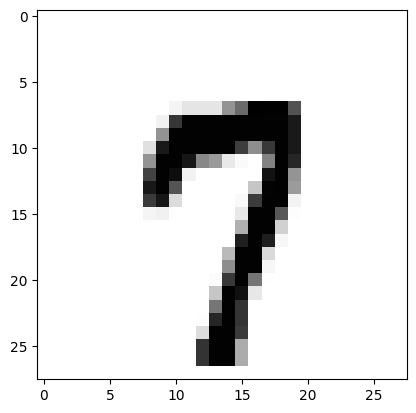

In [16]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()